[2.55424038 1.35191977 0.47450893]


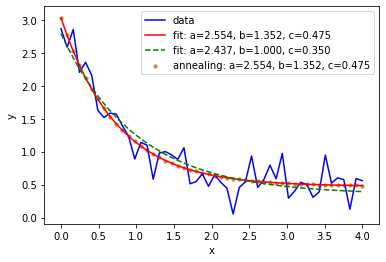

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from curve_fit import annealing
import numpy as np
#cool color codes
from matplotlib import colors as mcolors


#function properly formatted for scipy

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def f(x,p):
    return p[0] * np.exp(-p[1] * x )+ p[2]

#Define the data to be fit with some noise:

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

#Fit for the parameters a, b, c of the function func:


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))


#Monte Carlo technique
result = annealing.curve_fit(f, xdata, ydata,bounds=([0,3],[0,3],[0,3]))
print(result.x)


plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(xdata, f(xdata, result.x), color='peru',marker="o",s=10,label='annealing: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(result.x))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



[0.92952634 0.97388884]
[304.96975606 304.99364222]
[292.11013096 295.2140576 ]


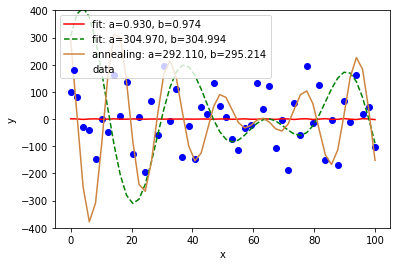

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from curve_fit import annealing
import numpy as np
#cool color codes
from matplotlib import colors as mcolors


#function properly formatted for scipy

def func(x, a, b):
    return a*np.cos(b*x)+b*np.sin(a*x)

def f(x,p):
    return p[0]*np.cos(p[1]*x)+p[1]*np.sin(p[0]*x)

#Define the data to be fit with some noise:

xdata = np.linspace(0., 100., 50)
y = func(xdata, 100.,102)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.scatter(xdata, ydata, color='blue', label='data')

#Fit for the parameters a, b, c of the function func:


popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# #Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=([299.9,299.9],[310.1,310.1]))
print(popt)

# #Monte Carlo technique
result = annealing.curve_fit(f, xdata, ydata,bounds=([290,310],[290,310]))
print(result.x)


plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(xdata, f(xdata, result.x), color='peru',label='annealing: a=%5.3f, b=%5.3f' % tuple(result.x))

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-400,400)
plt.legend(loc=2)
plt.show()

